## Rabiya Owais 05261
## This notebook contains code for:
## Identifying missing values and error values
## Fixing error values by replacing them with missing values
## Visualizing relatation of missing values in columns
## Fixing missing values strategies

#### Press Ctrl + Enter in each cell below to show the result

In [13]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline



In [14]:
missingdf = pd.read_csv("nyc-rolling-sales-dirty.csv")
#list all columns
missingdf.columns

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [15]:
#see data types
missingdf.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [16]:
#we have 84548 rows and 22 columns
missingdf.shape

(84548, 22)

In [17]:
#See the NaN values in some of the columns - these are the missing values
missingdf

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


## Identifying columns with missing/null values


In [18]:


#using the issnull().any() to generates a boolean array (True if the column has a missing value, False otherwise). You can use it to index into df.columns:

missingdf.columns[missingdf.isnull().any()]


Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE'],
      dtype='object')

In [19]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

## Identifying columns data entry errors we see LOT, BUILDING CLASS AT PRESENT, SALE PRICE AND SALES DATE have some data entry errrors



In [20]:
 #check and view all unique values in lot column
lots = missingdf['LOT'].unique()
lots

array(['No Number', '26', '39', ..., 423, 660, 679], dtype=object)

In [21]:
 #check and view all unique values in building class column
building = missingdf['BUILDING CLASS AT PRESENT'].unique()
building

array(['65000', 'C7', 'C4', 'C2', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0',
       'D4', 'RR', ' ', 'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9',
       'K4', 'M9', 'M3', 'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0',
       'R6', 'C5', 'C3', 'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6',
       'K1', 'K2', 'L9', 'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G6', 'P7',
       'M1', 'N2', 'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4',
       'Z9', 'B9', 'D3', 'G9', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3',
       'RW', 'C9', 'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1',
       'G7', 'G5', 'G4', 'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1',
       'E7', 'I5', 'R3', 'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9',
       'A7', 'D2', 'S0', 'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH',
       'W8', 'W6', 'A1', 'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9',
       'I3', 'W4', 'V3', 'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2',
       'F9', 'GU', 'I6', 'G8', 'P5', 'Y3', 'W9', 'M2', 

In [22]:
 #check and view all unique values in SALE PRICE class column
SALEPRICE = missingdf['SALE PRICE'].unique()
SALEPRICE

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [23]:
SALEDate = missingdf['SALE DATE'].unique()
SALEDate

array(['why ', '12/14/2016 0:00', '12/9/2016 0:00', '9/23/2016 0:00',
       '11/17/2016 0:00', 'later', '7/20/2017 0:00', '6/20/2017 0:00',
       '11/7/2016 0:00', '10/17/2016 0:00', '9/6/2016 0:00',
       '3/10/2017 0:00', '4/28/2017 0:00', '6/9/2017 0:00',
       '7/14/2017 0:00', '3/16/2017 0:00', '9/1/2016 0:00',
       '8/17/2017 0:00', '9/7/2016 0:00', '8/30/2017 0:00',
       '6/21/2017 0:00', '1/30/2017 0:00', '7/7/2017 0:00',
       '8/4/2017 0:00', '1/9/2017 0:00', '4/18/2017 0:00',
       '6/19/2017 0:00', '8/28/2017 0:00', '5/10/2017 0:00',
       '12/2/2016 0:00', '1/31/2017 0:00', '6/28/2017 0:00',
       '12/7/2016 0:00', '8/24/2017 0:00', '6/27/2017 0:00',
       '3/17/2017 0:00', '6/14/2017 0:00', '1/17/2017 0:00',
       '1/11/2017 0:00', '4/21/2017 0:00', '6/29/2017 0:00',
       '10/5/2016 0:00', '2/2/2017 0:00', '3/20/2017 0:00',
       '4/13/2017 0:00', '6/6/2017 0:00', '7/17/2017 0:00',
       '12/6/2016 0:00', '7/13/2017 0:00', '5/17/2017 0:00',
       '5/31/

## for these columns, Replacing these data entry errors with missing values 


In [24]:
#dealing with Lot column first 
missingdf["LOT"].replace({"No Number": ""}, inplace=True)
lots = missingdf['LOT'].unique()
lots

array(['', '26', '39', ..., 423, 660, 679], dtype=object)

In [25]:
#dealing with BUILDING CLASS AT PRESENT column 
missingdf["BUILDING CLASS AT PRESENT"].replace({"65000": ""}, inplace=True)
buildingclass = missingdf['BUILDING CLASS AT PRESENT'].unique()
buildingclass

array(['', 'C7', 'C4', 'C2', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4',
       'RR', ' ', 'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4',
       'M9', 'M3', 'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6',
       'C5', 'C3', 'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1',
       'K2', 'L9', 'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G6', 'P7', 'M1',
       'N2', 'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9',
       'B9', 'D3', 'G9', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'RW',
       'C9', 'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1', 'G7',
       'G5', 'G4', 'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1', 'E7',
       'I5', 'R3', 'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7',
       'D2', 'S0', 'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8',
       'W6', 'A1', 'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3',
       'W4', 'V3', 'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9',
       'GU', 'I6', 'G8', 'P5', 'Y3', 'W9', 'M2', 'G3',

In [26]:
#dealing with SALE PRICE column 
missingdf["SALE PRICE"].replace({" -  ": ""}, inplace=True)
SALEPRICE = missingdf['SALE PRICE'].unique()
SALEPRICE

array(['6625000', '', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [27]:
#finally dealing with SALESDATE column 
missingdf["SALE DATE"].replace({"why ": "","later": "","not sure": ""}, inplace=True)
SALEdate = missingdf['SALE DATE'].unique()
SALEdate

array(['', '12/14/2016 0:00', '12/9/2016 0:00', '9/23/2016 0:00',
       '11/17/2016 0:00', '7/20/2017 0:00', '6/20/2017 0:00',
       '11/7/2016 0:00', '10/17/2016 0:00', '9/6/2016 0:00',
       '3/10/2017 0:00', '4/28/2017 0:00', '6/9/2017 0:00',
       '7/14/2017 0:00', '3/16/2017 0:00', '9/1/2016 0:00',
       '8/17/2017 0:00', '9/7/2016 0:00', '8/30/2017 0:00',
       '6/21/2017 0:00', '1/30/2017 0:00', '7/7/2017 0:00',
       '8/4/2017 0:00', '1/9/2017 0:00', '4/18/2017 0:00',
       '6/19/2017 0:00', '8/28/2017 0:00', '5/10/2017 0:00',
       '12/2/2016 0:00', '1/31/2017 0:00', '6/28/2017 0:00',
       '12/7/2016 0:00', '8/24/2017 0:00', '6/27/2017 0:00',
       '3/17/2017 0:00', '6/14/2017 0:00', '1/17/2017 0:00',
       '1/11/2017 0:00', '4/21/2017 0:00', '6/29/2017 0:00',
       '10/5/2016 0:00', '2/2/2017 0:00', '3/20/2017 0:00',
       '4/13/2017 0:00', '6/6/2017 0:00', '7/17/2017 0:00',
       '12/6/2016 0:00', '7/13/2017 0:00', '5/17/2017 0:00',
       '5/31/2017 0:00', '

In [28]:
#fixing landsquare feet and gross squarefeet errors 
missingdf["GROSS SQUARE FEET"].replace({" -  ": ""}, inplace=True)
GROSSSQUAREFEET = missingdf['GROSS SQUARE FEET'].unique()
GROSSSQUAREFEET


array(['6440', '18690', '7803', ..., '977', '2683', '64117'], dtype=object)

In [29]:
missingdf["LAND SQUARE FEET"].replace({" -  ": ""}, inplace=True)
LANDSQUAREFEET = missingdf['LAND SQUARE FEET'].unique()
LANDSQUAREFEET

array(['1633', '4616', '2212', ..., '11088', '208033', '10796'],
      dtype=object)

In [30]:
#looking at the dataset again with error values replaced with missing values
missingdf
#print(missingdf.replace(r'^\s*$', np.nan, regex=True))

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,,,,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [31]:
#now replace all blanks with NAN to classify them as missing values

missingdf = missingdf.replace(r'^\s*$', np.nan, regex=True)


In [32]:
 ## and storing in new csv file:
missingdf.to_csv(r'missingdf_updated_dataset.csv', index = False)

In [33]:
missingdf.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,NaN,NaN,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,NaN
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,NaN,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,NaN,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,NaN,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,NaN,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,NaN,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,NaN,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


## Once data set is updated with missing values in place of error values, now conducting MVA

In [34]:
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [35]:
missingdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                   9
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

<AxesSubplot:>

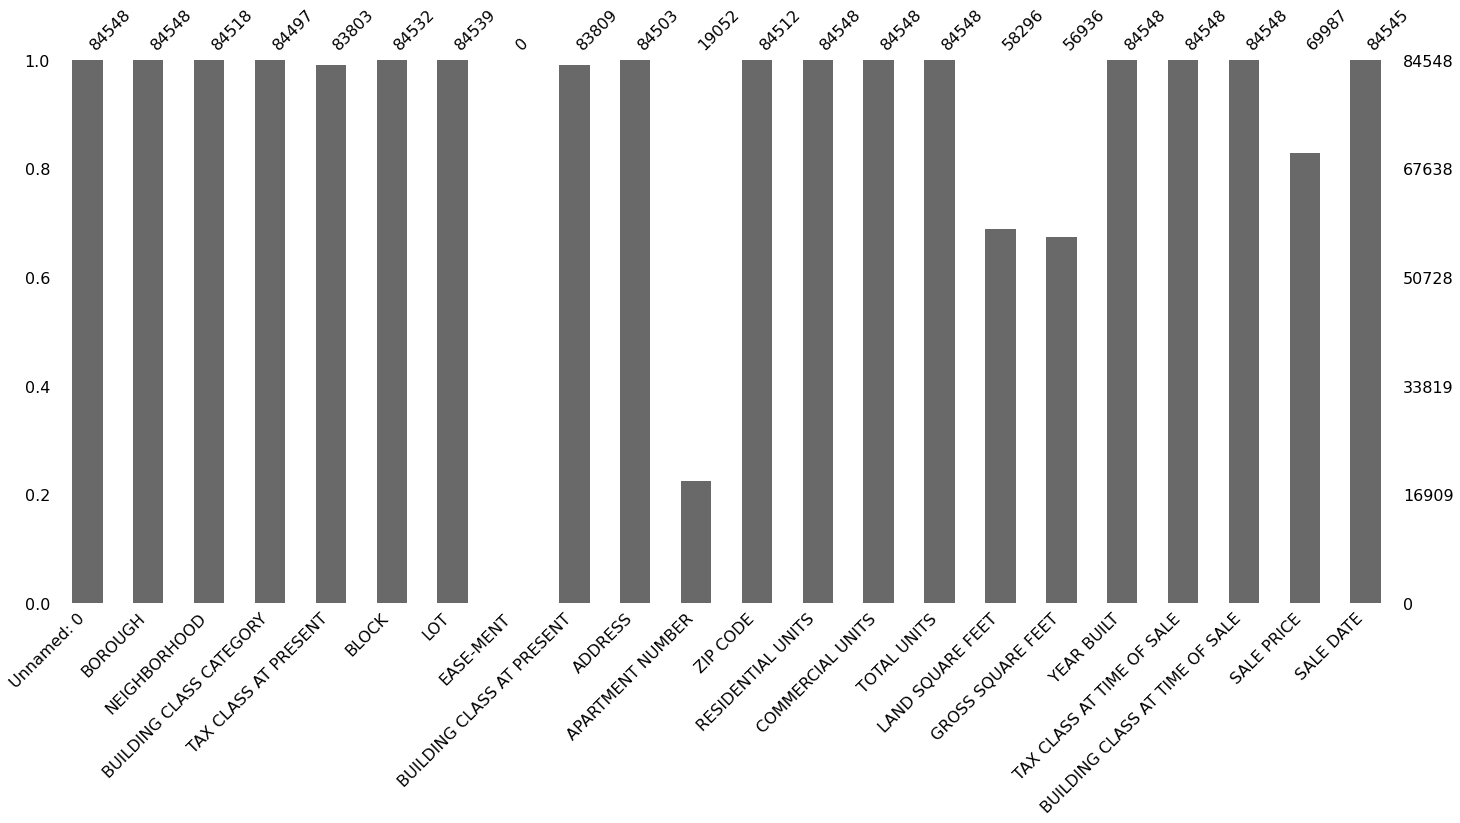

In [36]:
mano.bar(missingdf)

<AxesSubplot:>

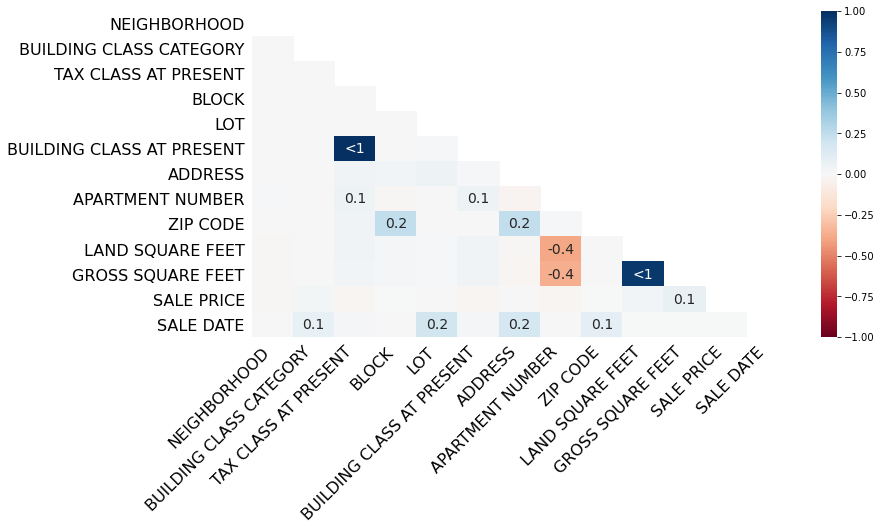

In [37]:
## now to check which columns are related and causing missingness
mano.heatmap(missingdf, figsize=(12,6))

## it can be seen that block, apartment number, sale date, zip code are dependant missing values and are examples of MAR.

<AxesSubplot:>

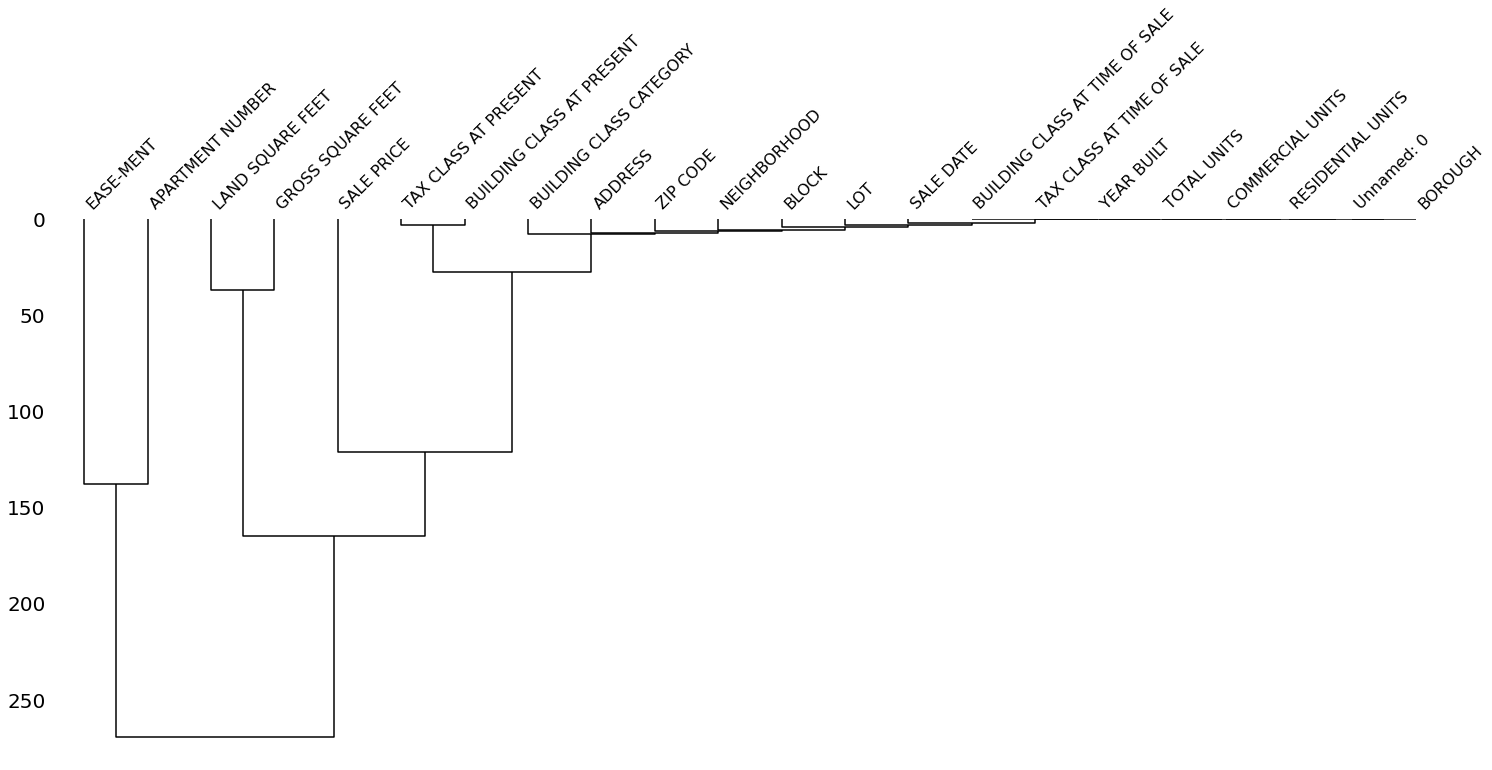

In [38]:
mano.dendrogram(missingdf)

## now to fix each column using MVA strategies

In [39]:
#fixing numerical columns- sale price,LAND SQUARE FEET,GROSS SQUARE FEET :

from sklearn.impute import SimpleImputer

#create a separate data frame for mean imputation
missingdf_mean = missingdf.copy(deep=True)

mean_imputation = SimpleImputer(strategy='mean')

#take only columns where mean imputation matters, i.e., numerical columns
missingdf_mean[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET','BLOCK']] = mean_imputation.fit_transform(missingdf_mean[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET','BLOCK']])

## for 'SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET', the mean imputation is used where mean values replace the missing values, 
## however, to make this more accurate, means should be taken with respect to another dimension example building class wise mean sale price

In [40]:
missingdf_mean

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,NaN,NaN,NaN,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,NaN
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,NaN,C7,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,NaN,C7,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,NaN,C4,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,NaN,C2,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,4.500000e+05,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,5.500000e+05,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,4.600000e+05,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,1.169334e+07,12/21/2016 0:00


In [41]:
missingdf_mean.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                 0
LOT                                   9
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## the ease-ment column is completely empty so we can drop it from our data set as its completely independent. 

In [42]:
missingdf_updated = missingdf_mean.drop(['EASE-MENT'], axis = 1) 

In [43]:
missingdf_updated.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                 0
LOT                                   9
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## now saving the updated and relatively clean data

In [45]:
missingdf_updated.to_csv(r'missingdf_cleaned.csv', index = False)